In [1]:
import os
import json
import pickle
import numpy as np
import pandas as pd
from collections import Counter
from itertools import combinations
import seaborn as sns
import matplotlib.pyplot as plt

training_data = json.loads(open('data/training_data.json').read())
test_data = json.loads(open('data/test_data.json').read())

data = training_data + test_data
print(len(data))

10788


In [2]:
labels_ref = pickle.load(open('data/labels_ref.rand123','rb'))
print(len(labels_ref))
print(np.mean([len(set(docu['labels']).intersection(labels_ref)) for docu in data]))

90
1.235446792732666


In [3]:
term2count_all = Counter([x for docu in data for x in docu['labels'] if x in labels_ref])
print(np.mean(list(term2count_all.values())))

148.11111111111111


In [4]:
sorted_terms = term2count_all.most_common()
sorted_values = [x[1] for x in sorted_terms]
sorted_ids = [x[0] for x in sorted_terms]

pair2count = Counter([x for docu in data for x in combinations(docu['labels'],2)])
pij = np.array([ [pair2count[tuple(sorted([i,j]))] for j in sorted_ids] for i in sorted_ids])/np.array([sorted_values])

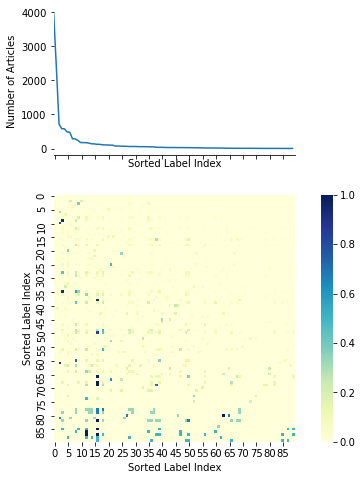

In [5]:
fig, ax  = plt.subplots(2, 2, sharex='col', gridspec_kw={'width_ratios':[100,5], 'height_ratios':[3,5]},figsize=(5,8))
ax[0,1].remove()  # remove unused upper right axes

ax[0,0].plot(np.arange(0,90,1),sorted_values)
ax[0,0].set_xticks(np.arange(0, 90, 5))
ax[0,0].set_xticklabels(np.arange(0, 90, 5))

ax[0,0].set_xlabel('Sorted Label Index')
ax[0,0].set_ylabel('Number of Articles')

left_side = ax[0,0].spines["left"]
left_side.set_visible(False)
up_side = ax[0,0].spines["top"]
up_side.set_visible(False)
right_side = ax[0,0].spines["right"]
right_side.set_visible(False)

sns.heatmap(pij.T, cmap="YlGnBu", xticklabels=5, yticklabels=5, square=False, ax=ax[1,0], cbar_ax=ax[1,1]) #, vmax=np.max(M_1), center=np.max(M_1)/2.)
ax[0,1].set_aspect('equal', adjustable='box')
ax[1,0].set_xlabel('Sorted Label Index')
ax[1,0].set_ylabel('Sorted Label Index')

fig.savefig('Reuters_both.pdf', format='pdf')